In [61]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import tree, metrics
data = pd.read_csv("Train_v2.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23524 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
bank_account              23524 non-null object
location_type             23524 non-null object
cellphone_access          23524 non-null object
household_size            23524 non-null int64
age_of_respondent         23524 non-null int64
gender_of_respondent      23524 non-null object
relationship_with_head    23524 non-null object
marital_status            23524 non-null object
education_level           23524 non-null object
job_type                  23524 non-null object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [62]:
data = data.drop(['uniqueid'], axis=1)

In [63]:
data.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [64]:
data.shape

(23524, 12)

In [65]:
data['bank_account'], class_names = pd.factorize(data['bank_account'])
data['bank_account']


0        0
1        1
2        0
3        1
4        1
        ..
23519    1
23520    1
23521    1
23522    1
23523    1
Name: bank_account, Length: 23524, dtype: int64

In [66]:
data['bank_account'], class_names = pd.factorize(data['bank_account'])
data['country'],_ = pd.factorize(data['country'])
data['year'],_ = pd.factorize(data['year'])
data['location_type'],_ = pd.factorize(data['location_type'])
data['cellphone_access'],_ = pd.factorize(data['cellphone_access'])
data['household_size'],_ = pd.factorize(data['household_size'])
data['age_of_respondent'],_ = pd.factorize(data['age_of_respondent'])
data['gender_of_respondent'],_ = pd.factorize(data['gender_of_respondent'])
data['relationship_with_head'],_ = pd.factorize(data['relationship_with_head'])
data['marital_status'],_ = pd.factorize(data['marital_status'])
data['education_level'],_ = pd.factorize(data['education_level'])
data['job_type'],_ = pd.factorize(data['job_type'])
data.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,1,1,0,1,1,1,1
2,0,0,0,1,0,1,2,1,2,2,2,0
3,0,0,1,0,0,1,3,0,1,0,3,2
4,0,0,1,1,1,2,2,1,3,2,3,3


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 12 columns):
country                   23524 non-null int64
year                      23524 non-null int64
bank_account              23524 non-null int64
location_type             23524 non-null int64
cellphone_access          23524 non-null int64
household_size            23524 non-null int64
age_of_respondent         23524 non-null int64
gender_of_respondent      23524 non-null int64
relationship_with_head    23524 non-null int64
marital_status            23524 non-null int64
education_level           23524 non-null int64
job_type                  23524 non-null int64
dtypes: int64(12)
memory usage: 2.2 MB


In [68]:

data.shape

(23524, 12)

In [69]:
x = data.loc[:, data.columns != 'bank_account']
y = data['bank_account']
y


0        0
1        1
2        0
3        1
4        1
        ..
23519    1
23520    1
23521    1
23522    1
23523    1
Name: bank_account, Length: 23524, dtype: int64

In [70]:
x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 11 columns):
country                   23524 non-null int64
year                      23524 non-null int64
location_type             23524 non-null int64
cellphone_access          23524 non-null int64
household_size            23524 non-null int64
age_of_respondent         23524 non-null int64
gender_of_respondent      23524 non-null int64
relationship_with_head    23524 non-null int64
marital_status            23524 non-null int64
education_level           23524 non-null int64
job_type                  23524 non-null int64
dtypes: int64(11)
memory usage: 2.0 MB


In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [72]:
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)
dtree.fit(X_train, y_train)

#use the model to make prediction
y_pred = dtree.predict(X_test)
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

Misclassified samples: 918


In [73]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.87


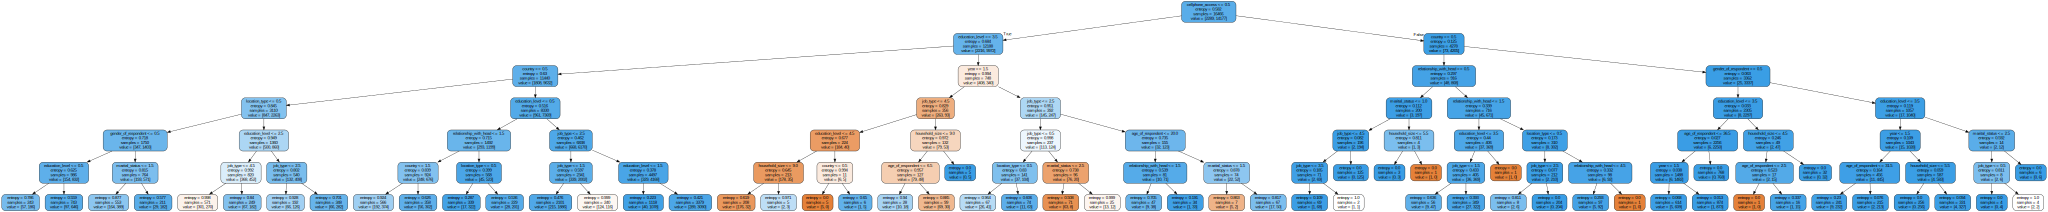

In [75]:
import graphviz
feature_names = x.columns
dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True,
feature_names=feature_names,
class_names=None)
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/icom/.conda/pkgs/graphviz-2.38-hfd603c8_2/Library/bin/graphviz'
graph = graphviz.Source(dot_data)
graph